In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
pd.set_option('display.max_columns', None)


In [3]:
df = pd.read_csv('../custom_data/Apply-RecruiterAction-PremiumUsers 1.csv')

/tmp/ipykernel_1813/310075372.py:1: DtypeWarning: Columns (5,7,9,14,17,19,22,28,42,43,44,45,46,60,61,62,63,64,65,66,67,68) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../custom_data/Apply-RecruiterAction-PremiumUsers 1.csv')


In [4]:
df.columns

Index(['passingYear', 'expYear', 'functionalArea_id', 'currentDesignation',
       'institute_name', 'institute_id', 'currentOrganization_name',
       'currentOrganization_id', 'industry_name', 'industry_id', 'userId',
       'expectedCtc', 'currentCtc', 'currentLocation_name',
       'currentLocation_id', 'jobId', 'timestamp', 'jobseekerId', 'refcode',
       'position', 'premium', 'designation', 'minExp', 'maxExp',
       'brandJobFlag', 'companyName', 'title', 'location', 'category',
       'functionalArea', 'minSal', 'maxSal', 'recruiterId', 'recruiterActions',
       'applicationId', 'result_1_applicationId', 'result_1_action_id',
       'preferredLocation_0', 'preferredLocation_1', 'preferredLocation_2',
       'preferredLocation_3', 'preferredLocation_4', 'preferredLocation_5',
       'preferredLocation_6', 'preferredLocation_7', 'preferredLocation_8',
       'preferredLocation_9', 'rActions_result_1_0', 'rActions_result_1_1',
       'rActions_result_1_2', 'rActions_result_1_3'

In [7]:
df = df[['passingYear', 'expYear', 'functionalArea_id', 'currentDesignation', 'institute_name', 'institute_id', 'currentOrganization_name',
       'currentOrganization_id', 'industry_name', 'industry_id', 'userId',
       'expectedCtc', 'currentCtc', 'currentLocation_name',
       'currentLocation_id', 'jobId', 'timestamp', 'jobseekerId', 'refcode',
       'position', 'premium', 'designation', 'minExp', 'maxExp',
       'brandJobFlag', 'companyName', 'title', 'location', 'category',
       'functionalArea', 'minSal', 'maxSal', 'recruiterId','recruiterActions',
       'applicationId','result_1_applicationId','result_1_action_id',
       'preferredLocation_0', 'preferredLocation_1', 'preferredLocation_2',
       'preferredLocation_3', 'preferredLocation_4', 'preferredLocation_5',
       'preferredLocation_6', 'preferredLocation_7', 'preferredLocation_8',
       'preferredLocation_9']]

In [30]:
# df.isnull().sum()

In [31]:
# df.refcode.value_counts()

In [19]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

df[numerical_features].head()

Number of numerical variables:  18


,passingYear,expYear,functionalArea_id,userId,expectedCtc,currentCtc,jobId,premium,maxExp,brandJobFlag,functionalArea,minSal,maxSal,recruiterId,recruiterActions,applicationId,result_1_applicationId,result_1_action_id
0,2022,0,12,2955601,5,1,1258991,0.0,1,0,4,4,6,150659,291,38922562,38922562,2
1,2022,0,12,2955601,5,1,1278830,0.0,2,0,13,4,8,144059,0,39003182,39003182,2
2,2019,4,13,2819828,15,9,1277575,0.0,6,0,4,5,12,69692,790,38897844,38897844,4
3,2021,2,16,2321372,18,12,1280130,0.0,4,0,31,30,35,151285,0,38858031,38858031,5
4,2021,2,16,2321372,18,12,1274501,0.0,8,0,18,7,25,69744,206,38858982,38858982,2


In [20]:
categorical_features = [feature for feature in df.columns if df[feature].dtypes == 'O']

print('Number of numerical variables: ', len(categorical_features))

df[categorical_features].head()

Number of numerical variables:  29


,currentDesignation,institute_name,institute_id,currentOrganization_name,currentOrganization_id,industry_name,industry_id,currentLocation_name,currentLocation_id,timestamp,jobseekerId,refcode,position,designation,minExp,companyName,title,location,category,preferredLocation_0,preferredLocation_1,preferredLocation_2,preferredLocation_3,preferredLocation_4,preferredLocation_5,preferredLocation_6,preferredLocation_7,preferredLocation_8,preferredLocation_9
0,NaN,"VIT University, Vellore",152,NaN,-1,IT,1,Delhi,221,2023-12-26T03:34:53.486,2955601,kp,15.0,Technical Product Manager,0,Factwise,FactWise - Technical Product Manager - Roadmap...,Mumbai,12,"{'name': 'Anywhere', 'id': 213}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,"VIT University, Vellore",152,NaN,-1,IT,1,Delhi,221,2023-12-29T06:17:23.562,2955601,jf_ml,11.0,Business Analyst,0,SPIRAEA SERVICES PRIVATE LIMITED,Spiraea - Business Analyst - Python/SQL (0-2 yrs),Delhi,13,"{'name': 'Anywhere', 'id': 213}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Business Analyst,"National Institute of Technology, Warangal (NITW)",136,Tavant Technologies,-1,IT,1,Noida,9,2023-12-25T03:36:32.967,2819828,recom_ev_ml,NaN,Business Analyst,2,NITS Solutions,NITS Solutions - Business Analyst - Project Ma...,Others,13,"{'name': 'Noida', 'id': 9}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,SOFTWARE ENGINEER,"Indian Institute of Technology, Delhi (IITD)",8,RXLOGIX COPORATION,-1,IT,1,Noida,9,2023-12-22T10:02:21.315,2321372,rl,NaN,Artificial Intelligence/Machine Learning Engineer,3,Thanks Buddy,Artificial Intelligence/Machine Learning Engin...,Anywhere in India/Multiple Locations,7,"{'name': 'Anywhere', 'id': 213}","{'name': 'Hyderabad', 'id': 6}","{'name': 'Mumbai', 'id': 8}","{'name': 'Pune', 'id': 10}",NaN,NaN,NaN,NaN,NaN,NaN
4,SOFTWARE ENGINEER,"Indian Institute of Technology, Delhi (IITD)",8,RXLOGIX COPORATION,-1,IT,1,Noida,9,2023-12-22T10:23:19.777,2321372,rl_aj_list_prm,NaN,Java developer,2,Loylogic Technologies,Loylogic Technologies - Java Developer - Solut...,Pune,1,"{'name': 'Anywhere', 'id': 213}","{'name': 'Hyderabad', 'id': 6}","{'name': 'Mumbai', 'id': 8}","{'name': 'Pune', 'id': 10}",NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
numerical_features

['passingYear',
 'expYear',
 'functionalArea_id',
 'userId',
 'expectedCtc',
 'currentCtc',
 'jobId',
 'premium',
 'maxExp',
 'brandJobFlag',
 'functionalArea',
 'minSal',
 'maxSal',
 'recruiterId',
 'recruiterActions',
 'applicationId',
 'result_1_applicationId',
 'result_1_action_id']

In [22]:
df.nunique()

passingYear                    52
expYear                        32
functionalArea_id              54
currentDesignation           8285
institute_name              13986
institute_id                  779
currentOrganization_name    13439
currentOrganization_id         39
industry_name                  61
industry_id                   103
userId                      32943
expectedCtc                    92
currentCtc                     99
currentLocation_name          239
currentLocation_id            404
jobId                        5872
timestamp                   83420
jobseekerId                 32960
refcode                        82
position                     1094
premium                        10
designation                  2182
minExp                         54
maxExp                         31
brandJobFlag                   13
companyName                  2062
title                        5804
location                       91
category                       33
functionalArea

In [35]:
df[['refcode','result_1_action_id']]

,refcode,result_1_action_id
0,kp,2
1,jf_ml,2
2,recom_ev_ml,4
3,rl,5
4,rl_aj_list_prm,2
...,...,...
83415,jf_ml,4
83416,sp,4
83417,sp,4
83418,sp,4


In [36]:
df[['refcode', 'result_1_action_id']].plot(kind='bar', x='refcode', y='result_1_action_id', legend=False)

plt.xlabel('Refcode')
plt.ylabel('Result 1 Action ID')
plt.title('Plot of Result 1 Action ID for each Refcode')
plt.show()



KeyboardInterrupt



In [37]:
print('hi')

hi


In [41]:
rp = df[['refcode', 'position']].dropna()


In [47]:
rp.head(10)

,refcode,position
0,kp,15.0
1,jf_ml,11.0
6,rl_aj_br,6.0
9,rl_aj,11.0
11,rl_aj_br,3.0
13,cl_br,9.0
15,multiapp,5.0
16,multiapp,1.0
17,kp,4.0
20,multiapp,54.0


In [48]:
rp['position'] = pd.to_numeric(rp['position'], errors='coerce')  
rp['position'] = rp['position'].astype('Int64')

In [52]:
rp['refcode'].value_counts()

refcode
multiapp        16828
sp               2819
rl_aj_br         1915
kp               1860
jf_ml            1530
rl_aj            1217
jf_pml           1207
jf               1021
cl                833
kp_br             603
sp_br             322
cl_br             305
rl_br             277
kp_prm            260
rl_aj_br_prm      240
rl                228
cl_prm            206
sp_prm            199
kp_br_prm         111
cl_br_prm          92
jf_prm             80
sp_br_prm          54
rl_aj_prm          47
clp_k              46
rl_br_prm          31
rl_prm             17
clp_p              13
2326894            12
googlejob           9
LinkedIn            8
ev_earlyapp         8
2887350             5
recom_ev_ml         5
clp_f               5
clp_e               3
neuvoo              3
ep_ev_ml            2
ep_ev               2
ep_weekly           1
google              1
default             1
ep                  1
adzuna              1
ln                  1
recom_apply         1
ep

In [53]:
rp['position'].value_counts()

position
1      2935
2      1896
3      1420
4      1111
5      1076
       ... 
521       1
330       1
501       1
895       1
515       1
Name: count, Length: 711, dtype: Int64

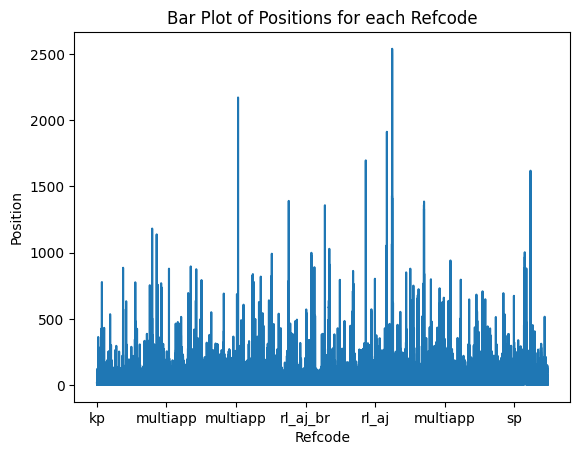

In [54]:
rp.plot(x='refcode', y='position', kind='', legend=False)

plt.xlabel('Refcode')
plt.ylabel('Position')
plt.title('Bar Plot of Positions for each Refcode')
plt.show()

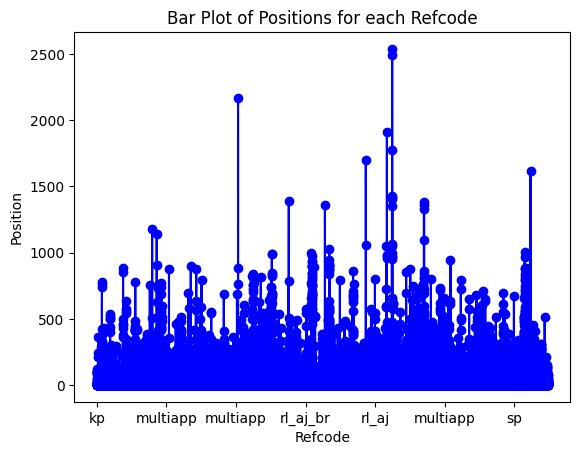

In [55]:
rp.plot(x='refcode', y='position', kind='line', marker='o', linestyle='-', color='b', legend=False)
plt.xlabel('Refcode')
plt.ylabel('Position')
plt.title('Bar Plot of Positions for each Refcode')
plt.show()

<Axes: xlabel='refcode', ylabel='position'>

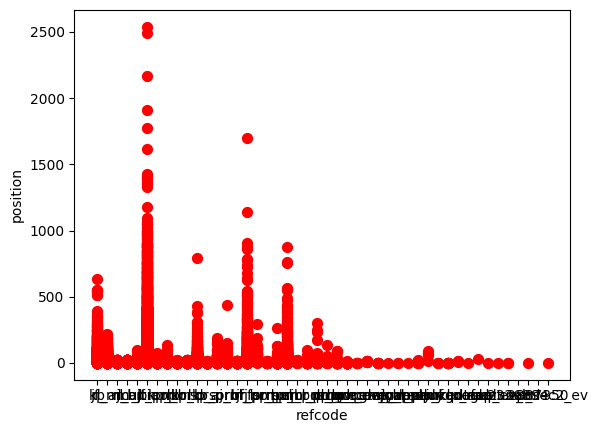

In [56]:
rp.plot(x='refcode', y='position', kind='scatter', color='r', marker='o', s=50, legend=False)


<Figure size 1500x800 with 0 Axes>

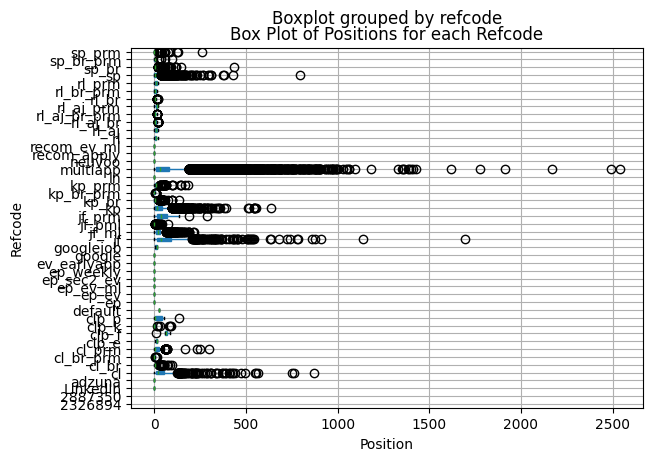

In [61]:
plt.figure(figsize=(15, 8))
rp.boxplot(column='position', by='refcode', vert=False, patch_artist=True)

plt.xlabel('Position')
plt.ylabel('Refcode')
plt.title('Box Plot of Positions for each Refcode')
plt.show()

/tmp/ipykernel_1813/566583131.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='position', y='refcode', data=rp, orient='h', palette='viridis')


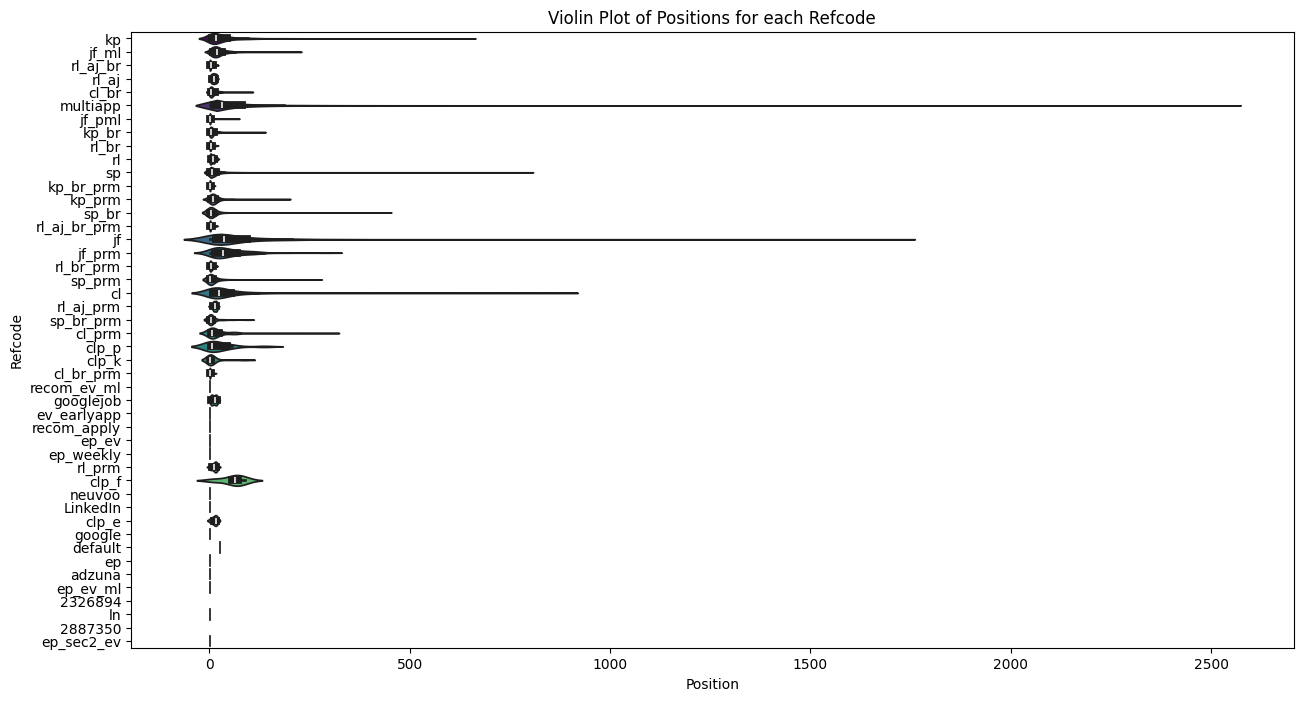

In [63]:
import seaborn as sns

plt.figure(figsize=(15, 8))
sns.violinplot(x='position', y='refcode', data=rp, orient='h', palette='viridis')

plt.xlabel('Position')
plt.ylabel('Refcode')
plt.title('Violin Plot of Positions for each Refcode')
plt.show()

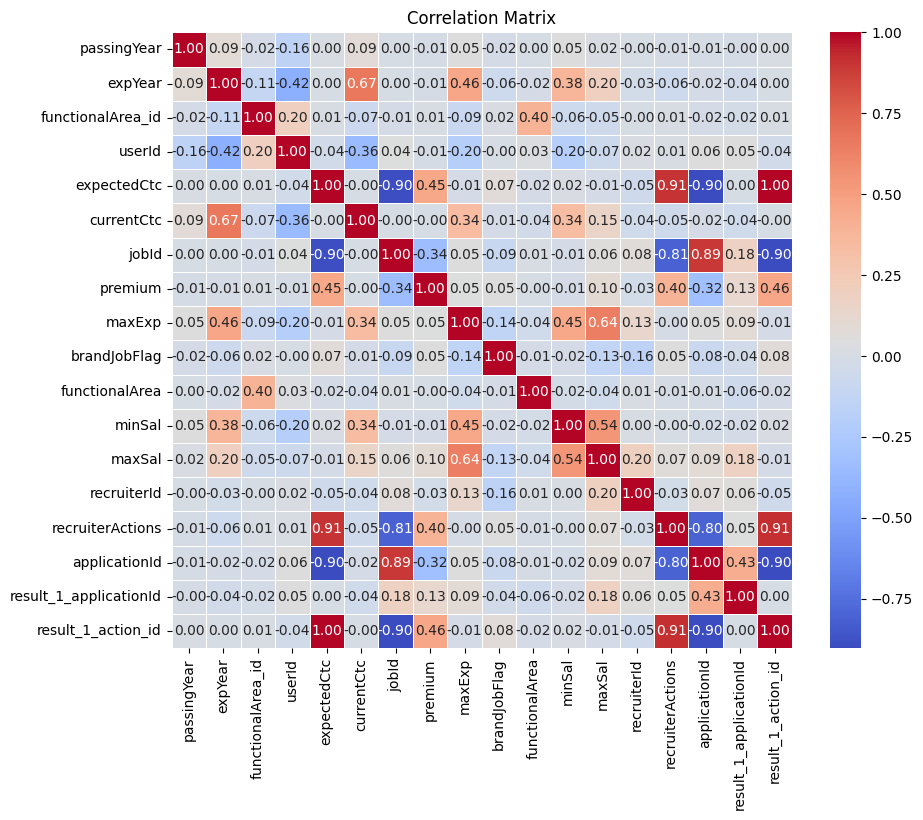

In [64]:
correlation_matrix = df[numerical_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

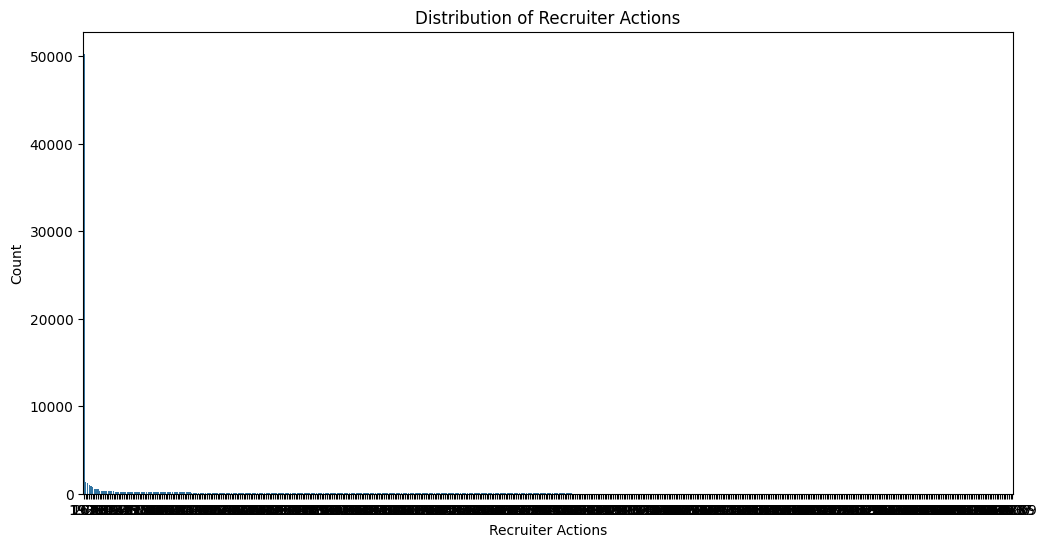

In [65]:
plt.figure(figsize=(12, 6))
sns.countplot(x='recruiterActions', data=df, order=df['recruiterActions'].value_counts().index)
plt.xlabel('Recruiter Actions')
plt.ylabel('Count')
plt.title('Distribution of Recruiter Actions')
plt.show()

In [24]:
# dfn.isnull().sum()

In [66]:
df[['recruiterActions']]

,recruiterActions
0,291
1,0
2,790
3,0
4,206
...,...
83415,0
83416,0
83417,0
83418,0


In [29]:
for feature in numerical_features:
    data=df[numerical_features]
    # d = data[feature]
    data[feature] = np.where(data[feature])
    data.groupby(feature)['functionalArea'].median().plot.bar()
    plt.title(feature)
    plt.show()

ValueError: Length of values (1) does not match length of index (83420)

In [28]:
# data

,passingYear,expYear,functionalArea_id,userId,expectedCtc,currentCtc,jobId,premium,maxExp,brandJobFlag,functionalArea,minSal,maxSal,recruiterId,recruiterActions,applicationId,result_1_applicationId,result_1_action_id
0,2022,0,12,2955601,5,1,1258991,0.0,1,0,4,4,6,150659,291,38922562,38922562,2
1,2022,0,12,2955601,5,1,1278830,0.0,2,0,13,4,8,144059,0,39003182,39003182,2
2,2019,4,13,2819828,15,9,1277575,0.0,6,0,4,5,12,69692,790,38897844,38897844,4
3,2021,2,16,2321372,18,12,1280130,0.0,4,0,31,30,35,151285,0,38858031,38858031,5
4,2021,2,16,2321372,18,12,1274501,0.0,8,0,18,7,25,69744,206,38858982,38858982,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83415,0,4,5,1655219,10,8,1284731,0.0,5,0,5,12,18,158741,0,39505341,39505341,4
83416,0,4,5,1655219,10,8,1287202,0.0,10,0,15,15,22,169917,0,39506723,39506723,4
83417,0,4,5,1655219,10,8,1284964,0.0,15,0,5,20,40,174905,0,39670405,39670405,4
83418,0,4,5,1655219,10,8,1288205,0.0,7,0,5,10,16,141024,0,39670333,39670333,4


<Axes: xlabel='recruiterActions'>

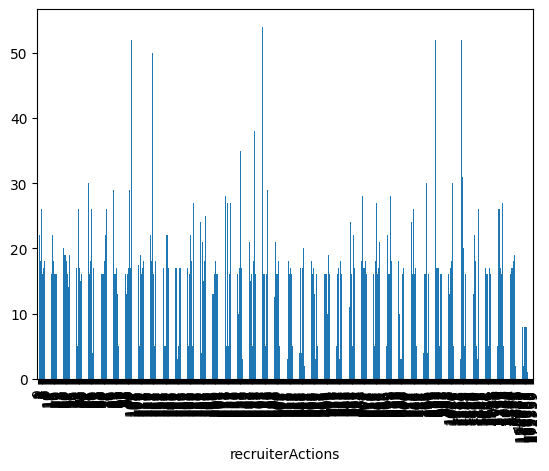

In [47]:

dfn.groupby('recruiterActions')['functionalArea'].median().plot.bar()
